## Data exploration

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('log_noERR')

In [3]:
df=df[(df['Cod']== 2) |(df['Cod']== 3)]
df.head()

,Unnamed: 0,Time,num,Type,Cod,Message
1,1,2022-05-05 15:09:18,133,INFO,2,Numero di stream online: 1597
2,2,2022-05-05 15:09:25,487,INFO,3,Numero di spettatori online: 44353
5,5,2022-05-05 15:14:18,425,INFO,2,Numero di stream online: 1658
6,6,2022-05-05 15:14:26,874,INFO,3,Numero di spettatori online: 45230
9,9,2022-05-05 15:19:40,947,INFO,2,Numero di stream online: 1692


In [4]:
df['Num'] = df['Message'].str.split(':').str[1]

In [5]:
df.head()

,Unnamed: 0,Time,num,Type,Cod,Message,Num
1,1,2022-05-05 15:09:18,133,INFO,2,Numero di stream online: 1597,1597
2,2,2022-05-05 15:09:25,487,INFO,3,Numero di spettatori online: 44353,44353
5,5,2022-05-05 15:14:18,425,INFO,2,Numero di stream online: 1658,1658
6,6,2022-05-05 15:14:26,874,INFO,3,Numero di spettatori online: 45230,45230
9,9,2022-05-05 15:19:40,947,INFO,2,Numero di stream online: 1692,1692


In [6]:
#convert string column type in int
df['Num'] = pd.to_numeric(df['Num'])

In [7]:
times=[]
for time in  df['Time']:
    times.append(datetime.strptime(time, '%Y-%m-%d %H:%M:%S'))
df['Time']= times    

In [8]:
df['Hour']= df['Time'].dt.hour

In [9]:
df.head()

,Unnamed: 0,Time,num,Type,Cod,Message,Num,Hour
1,1,2022-05-05 15:09:18,133,INFO,2,Numero di stream online: 1597,1597,15
2,2,2022-05-05 15:09:25,487,INFO,3,Numero di spettatori online: 44353,44353,15
5,5,2022-05-05 15:14:18,425,INFO,2,Numero di stream online: 1658,1658,15
6,6,2022-05-05 15:14:26,874,INFO,3,Numero di spettatori online: 45230,45230,15
9,9,2022-05-05 15:19:40,947,INFO,2,Numero di stream online: 1692,1692,15


In [10]:
streamon= df[df['Cod']== 2]

In [11]:
streamon=streamon.groupby('Hour')['Num'].mean()

In [12]:
streamon= streamon.to_frame()

In [13]:
specton= df[df['Cod']== 3]

In [14]:
specton=specton.groupby('Hour')['Num'].mean()

In [15]:
specton=specton.to_frame()

Text(0.5, 1.0, 'Media di streamer online per fascia oraria')

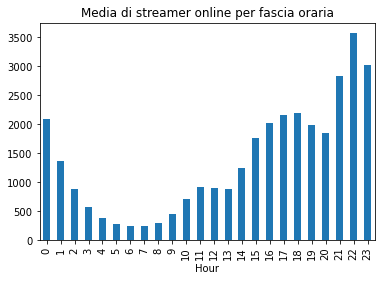

In [16]:
streamon.plot(kind='bar', legend=False)
plt.title('Media di streamer online per fascia oraria')

Text(0.5, 1.0, 'Media di spettatori online per fascia oraria')

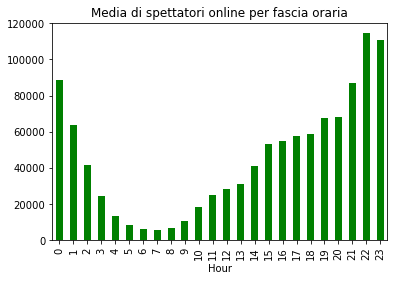

In [17]:
specton.plot(kind='bar', color= 'green', legend= False)
plt.title('Media di spettatori online per fascia oraria')

In [18]:
streamer_dataset = pd.read_csv('https://raw.githubusercontent.com/gianscuri/Twitch_Community_Graph/main/DataProcessing/Streamer_dataset.csv')

In [19]:
streamer_dataset.shape[0] #numero streamer analizzati

2977

In [22]:
stats=streamer_dataset.describe()

In [23]:
stats.head()

,ID_streamer,minutes_live,viewer_mean,viewer_peak,spect_mean,spect_tot
count,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000
mean,1488.000000,1466.684582,121.908969,313.533759,83.692308,1656.022506
std,859.530201,1735.805536,565.179815,1389.299783,406.932335,7450.436019
min,0.000000,15.000000,10.000000,11.000000,0.000000,10.000000
25%,744.000000,345.000000,14.000000,30.000000,9.000000,82.000000


In [24]:
stats.drop(['ID_streamer', 'viewer_mean', 'viewer_peak','spect_mean'], axis=1, inplace=True)
stats.drop('count', axis=0, inplace=True)

In [25]:
stats.rename(columns= {'minutes_live': 'minuti trascorsi in live',
                      'spect_tot': 'spettatori totali'}, inplace=True)

In [26]:
stats

,minuti trascorsi in live,spettatori totali
mean,1466.684582,1656.022506
std,1735.805536,7450.436019
min,15.000000,10.000000
25%,345.000000,82.000000
50%,960.000000,231.000000
75%,2010.000000,801.000000
max,19125.000000,157718.000000


In [97]:
games = pd.read_json("games.json")

In [98]:
games=games.transpose()

In [100]:
games.shape

(54946, 30)

In [99]:
games.head()

,name,release_date,required_age,is_free,price,detailed_description,about_the_game,short_description,supported_languages,header_image,...,movies,dlc_count,reviews,support_url,support_email,metacritic_score,metacritic_url,recommendations,notes,packages
906850,Again?,"{'coming_soon': False, 'date': 'Aug 8, 2018'}",0,False,$0.49,Again? is easy game for relax with quiet music...,Again? is easy game for relax with quiet music...,Just open and play!,English,https://cdn.akamai.steamstatic.com/steam/apps/...,...,[http://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906880,goto,"{'coming_soon': False, 'date': 'Aug 17, 2018'}",0,False,$1.99,<strong>goto</strong> is a minimalistic maze g...,<strong>goto</strong> is a minimalistic maze g...,goto is a minimalistic maze game which leads y...,"English, French, Italian, German, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,[http://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906920,Political Puzzle,"{'coming_soon': False, 'date': 'Aug 7, 2018'}",0,False,$0.99,Political Puzzle - slide puzzle game. You need...,Political Puzzle - slide puzzle game. You need...,Political Puzzle - slide puzzle game. You need...,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,[http://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906950,Bomb Riders,"{'coming_soon': False, 'date': 'Aug 29, 2018'}",0,False,$1.99,<u>GAMEPLAY</u><br><br>Classic gameplay of the...,<u>GAMEPLAY</u><br><br>Classic gameplay of the...,"Bomb Riders - a game in the bomber genre, whic...","English, French, Italian, German, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,[http://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907000,The Navigator,"{'coming_soon': False, 'date': 'Aug 3, 2018'}",0,True,,The Navigator is a 2D puzzle-platformer where ...,The Navigator is a 2D puzzle-platformer where ...,The Navigator is a 2D puzzle-platformer where ...,English,https://cdn.akamai.steamstatic.com/steam/apps/...,...,[http://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
games['name'].unique().shape

(54593,)

In [114]:
games['name'].value_counts()

Shadow of the Tomb Raider: Definitive Edition    19
Alone                                             4
Bounce                                            4
Lost                                              4
Aurora                                            4
                                                 ..
The Hero of Bangaona                              1
Project: Cow                                      1
Phoenix Pro Theater Media Player                  1
Spirited Thief Playtest                           1
JUMPGRID                                          1
Name: name, Length: 54593, dtype: int64

In [117]:
games[games['name']== 'Bounce'] #più giochi con lo stesso nome

,name,release_date,required_age,is_free,price,detailed_description,about_the_game,short_description,supported_languages,header_image,...,movies,dlc_count,reviews,support_url,support_email,metacritic_score,metacritic_url,recommendations,notes,packages
827920,Bounce,"{'coming_soon': False, 'date': 'Apr 2, 2018'}",0,False,$0.99,Bounce-puzzle game in which you have to apply ...,Bounce-puzzle game in which you have to apply ...,Bounce-puzzle game in which you have to apply ...,"English, Russian",https://cdn.akamai.steamstatic.com/steam/apps/...,...,[http://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464400,Bounce,"{'coming_soon': False, 'date': 'Nov 30, 2016'}",0,False,$19.99,<h1>Demo Expired</h1><p><strong>Bounce Demo Ex...,Bounce is a VR physics-based puzzle game for t...,Bounce is a VR physics-based puzzle game for H...,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,[http://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1469090,Bounce,"Feb 5, 2021",0,NaN,2.99,Bounce is a procedurally generated physics-bas...,Bounce is a procedurally generated physics-bas...,Launch your ball into the high-scores in this ...,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,[http://cdn.akamai.steamstatic.com/steam/apps/...,0,,https://rarecamel.com/,rob@rarecamel.com,0,,0,,"[{'title': 'Buy Bounce', 'description': '', 's..."
1116300,Bounce,"Jul 23, 2019",0,NaN,0.99,Bounce is a mini game about getting the ball i...,Bounce is a mini game about getting the ball i...,Bounce is a mini game about getting the ball i...,"English, Simplified Chinese",https://cdn.akamai.steamstatic.com/steam/apps/...,...,[http://cdn.akamai.steamstatic.com/steam/apps/...,0,,,liyuze890726@gmail.com,0,,0,,"[{'title': 'Buy Bounce', 'description': '', 's..."
